In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e1/sample_submission.csv
/kaggle/input/playground-series-s5e1/train.csv
/kaggle/input/playground-series-s5e1/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')
train.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [3]:
test = pd.read_csv('/kaggle/input/playground-series-s5e1/test.csv')
test.head()

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


## Train data 
- check columns and their classes

In [4]:
train_cols = train.columns.to_list()
print(train_cols)

['id', 'date', 'country', 'store', 'product', 'num_sold']


### Check for missing values

In [5]:
for i in train_cols:
    print(f'{i}:{train[i].isna().sum()}')

id:0
date:0
country:0
store:0
product:0
num_sold:8871


### Unique values

In [6]:
for i in train_cols:
    print(f'{i}:{len(train[i].unique())}')

id:230130
date:2557
country:6
store:3
product:5
num_sold:4038


In [7]:
train.dtypes

id            int64
date         object
country      object
store        object
product      object
num_sold    float64
dtype: object

In [8]:
print(f'{train.country.unique()}')
print(f'{train.store.unique()}')
print(train['product'].unique())

['Canada' 'Finland' 'Italy' 'Kenya' 'Norway' 'Singapore']
['Discount Stickers' 'Stickers for Less' 'Premium Sticker Mart']
['Holographic Goose' 'Kaggle' 'Kaggle Tiers' 'Kerneler'
 'Kerneler Dark Mode']


## Test Data

In [9]:
test_cols = test.columns.to_list()
print(test_cols)

['id', 'date', 'country', 'store', 'product']


In [10]:
for i in test_cols:
    print(f'{i}:{test[i].isna().sum()}')

id:0
date:0
country:0
store:0
product:0


In [11]:
for i in test_cols:
    print(f'{i}:{len(test[i].unique())}')

id:98550
date:1095
country:6
store:3
product:5


In [12]:
print(f'{test.country.unique()}')
print(f'{test.store.unique()}')
print(test['product'].unique())

['Canada' 'Finland' 'Italy' 'Kenya' 'Norway' 'Singapore']
['Discount Stickers' 'Stickers for Less' 'Premium Sticker Mart']
['Holographic Goose' 'Kaggle' 'Kaggle Tiers' 'Kerneler'
 'Kerneler Dark Mode']


In [13]:
test.dtypes

id          int64
date       object
country    object
store      object
product    object
dtype: object

## Preprocessing : Train

In [14]:
train_preprocess = train.copy()

In [15]:
train_preprocess['date'] = pd.to_datetime(train_preprocess['date'].to_list())

In [16]:
train_preprocess.dtypes

id                   int64
date        datetime64[ns]
country             object
store               object
product             object
num_sold           float64
dtype: object

In [17]:
train_preprocess.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


Encoding
> country:6
> 
> store:3
> 
> product:5


In [18]:
from sklearn import preprocessing

label_encoder_country = preprocessing.LabelEncoder()
train_preprocess['country']= label_encoder_country.fit_transform(train_preprocess['country'])

In [19]:
label_encoder_store = preprocessing.LabelEncoder()
train_preprocess['store']= label_encoder_store.fit_transform(train_preprocess['store'])

In [20]:
label_encoder_product = preprocessing.LabelEncoder()
train_preprocess['product']= label_encoder_product.fit_transform(train_preprocess['product'])

In [21]:
train_preprocess

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,date,country,store,product,num_sold
0,0,2010-01-01,0,0,0,NaN
1,1,2010-01-01,0,0,1,973.0
2,2,2010-01-01,0,0,2,906.0
3,3,2010-01-01,0,0,3,423.0
4,4,2010-01-01,0,0,4,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,5,1,0,466.0
230126,230126,2016-12-31,5,1,1,2907.0
230127,230127,2016-12-31,5,1,2,2299.0
230128,230128,2016-12-31,5,1,3,1242.0


Handle Missing Values

In [22]:
train_preprocess.num_sold.isna().sum()

8871

In [23]:
train_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id        230130 non-null  int64         
 1   date      230130 non-null  datetime64[ns]
 2   country   230130 non-null  int64         
 3   store     230130 non-null  int64         
 4   product   230130 non-null  int64         
 5   num_sold  221259 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 10.5 MB


In [24]:
print(train_preprocess['date'][0])
print(train['date'][0])

2010-01-01 00:00:00
2010-01-01


In [25]:
#train_preprocess['date'][0]
train_preprocess['date'] = pd.to_datetime(train_preprocess['date']).dt.date

In [26]:
print(train_preprocess['date'][0])

2010-01-01


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='date', ylabel='num_sold'>

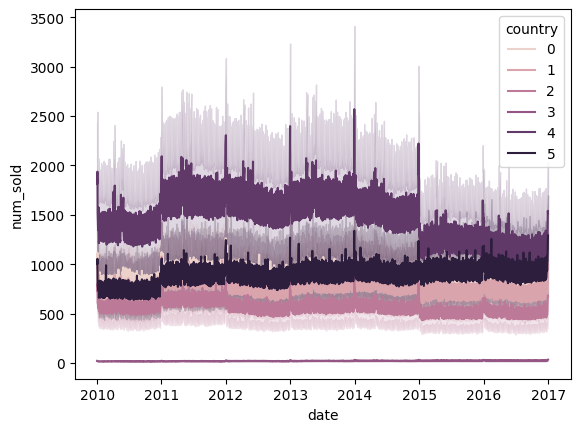

In [28]:
# Plot the responses for different events and regions
sns.lineplot(x="date", y="num_sold",
             hue="country",
             data=train_preprocess)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='num_sold'>

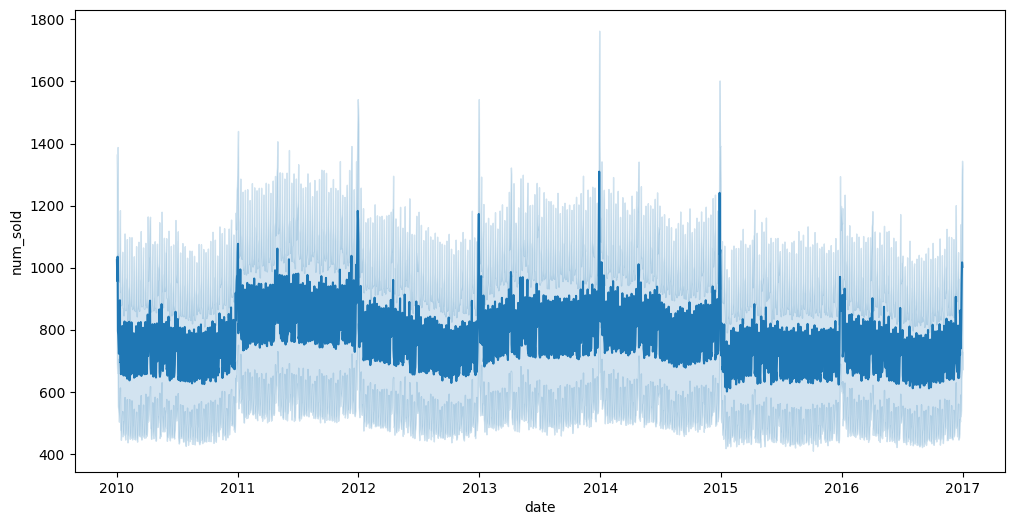

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="num_sold",
             data=train_preprocess[train_preprocess['country']==1])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='num_sold'>

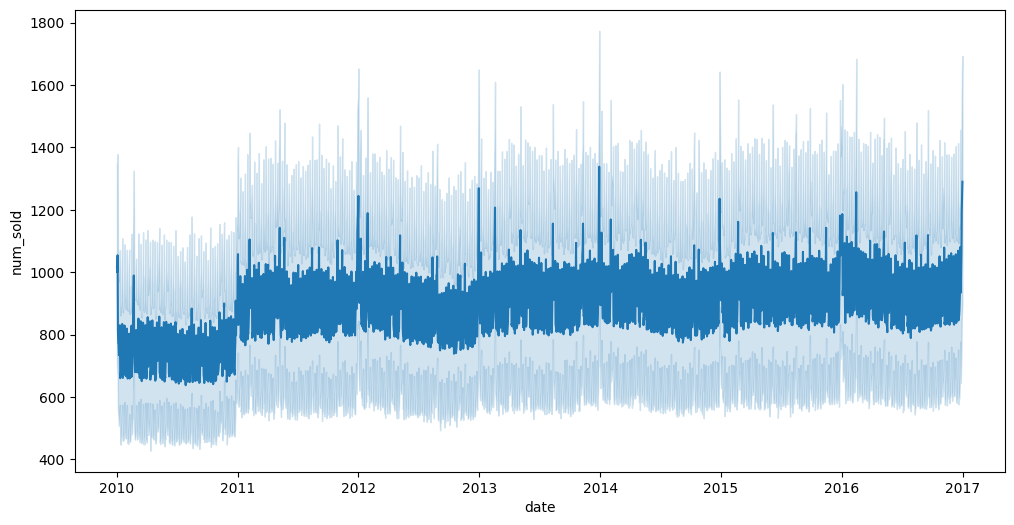

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="num_sold",
             data=train_preprocess[train_preprocess['country']==5])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='num_sold'>

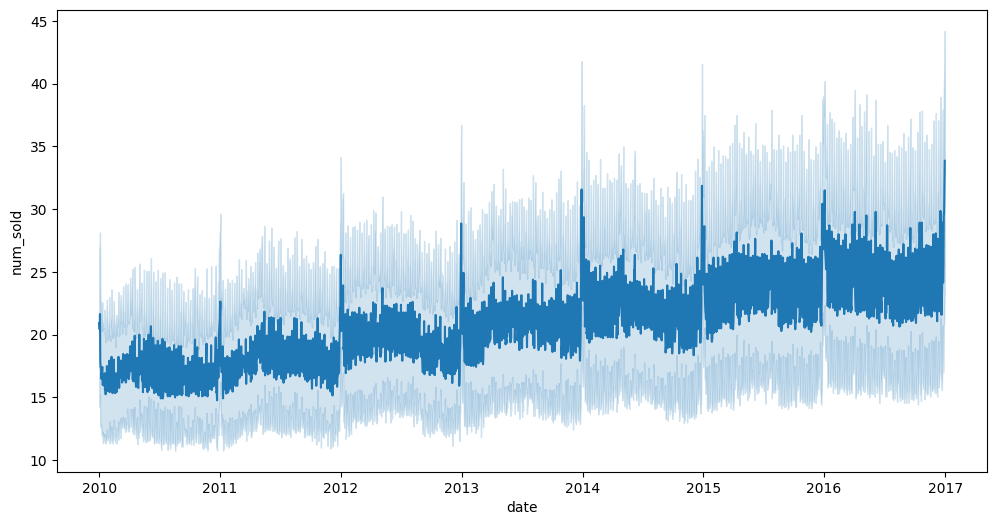

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="num_sold",
             data=train_preprocess[train_preprocess['country']==3])

In [32]:
train_preprocess[train_preprocess['country']==5]

,id,date,country,store,product,num_sold
75,75,2010-01-01,5,0,0,150.0
76,76,2010-01-01,5,0,1,939.0
77,77,2010-01-01,5,0,2,768.0
78,78,2010-01-01,5,0,3,405.0
79,79,2010-01-01,5,0,4,495.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,5,1,0,466.0
230126,230126,2016-12-31,5,1,1,2907.0
230127,230127,2016-12-31,5,1,2,2299.0
230128,230128,2016-12-31,5,1,3,1242.0


In [33]:
train_preprocess['year'] = pd.to_datetime(train_preprocess['date']).dt.year

In [34]:
train_preprocess['month'] = pd.to_datetime(train_preprocess['date']).dt.month

In [35]:
train_preprocess['day'] = pd.to_datetime(train_preprocess['date']).dt.day

In [36]:
train_preprocess

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,date,country,store,product,num_sold,year,month,day
0,0,2010-01-01,0,0,0,NaN,2010,1,1
1,1,2010-01-01,0,0,1,973.0,2010,1,1
2,2,2010-01-01,0,0,2,906.0,2010,1,1
3,3,2010-01-01,0,0,3,423.0,2010,1,1
4,4,2010-01-01,0,0,4,491.0,2010,1,1
...,...,...,...,...,...,...,...,...,...
230125,230125,2016-12-31,5,1,0,466.0,2016,12,31
230126,230126,2016-12-31,5,1,1,2907.0,2016,12,31
230127,230127,2016-12-31,5,1,2,2299.0,2016,12,31
230128,230128,2016-12-31,5,1,3,1242.0,2016,12,31


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

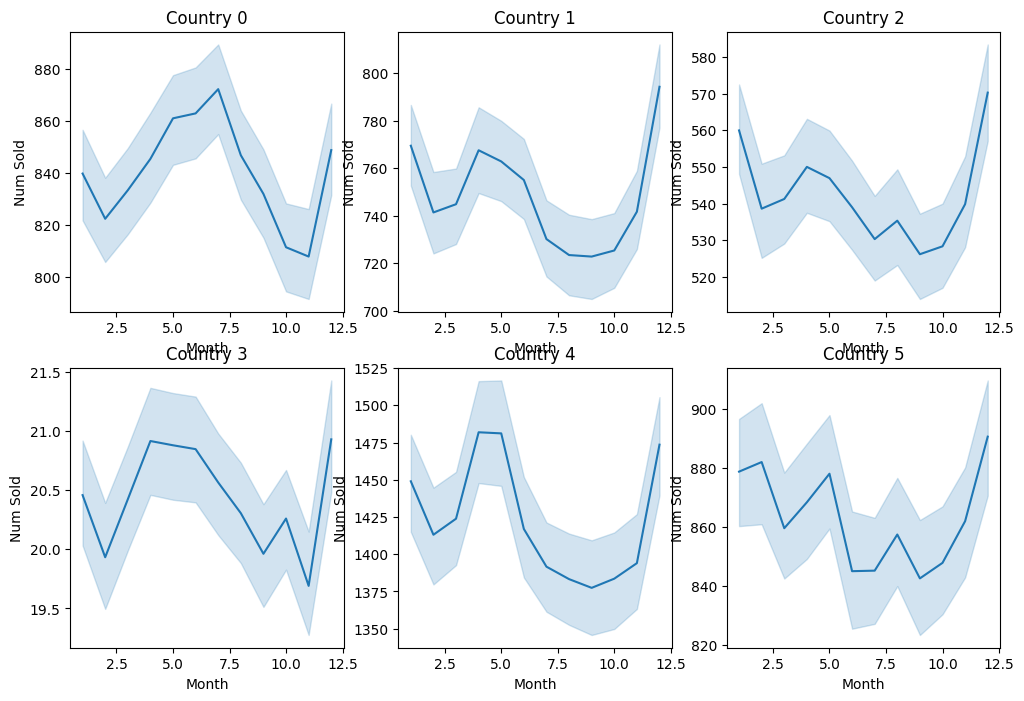

In [37]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()
for i in range(6):
    ax = axes[i]  # Get the current subplot axis
    sns.lineplot(x="month", y="num_sold", data=train_preprocess[train_preprocess['country'] == i], ax=ax)
    ax.set_title(f"Country {i}") #set title for each subplot
    ax.set_xlabel("Month") #set x label for each subplot
    ax.set_ylabel("Num Sold") #set y label for each subplot

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

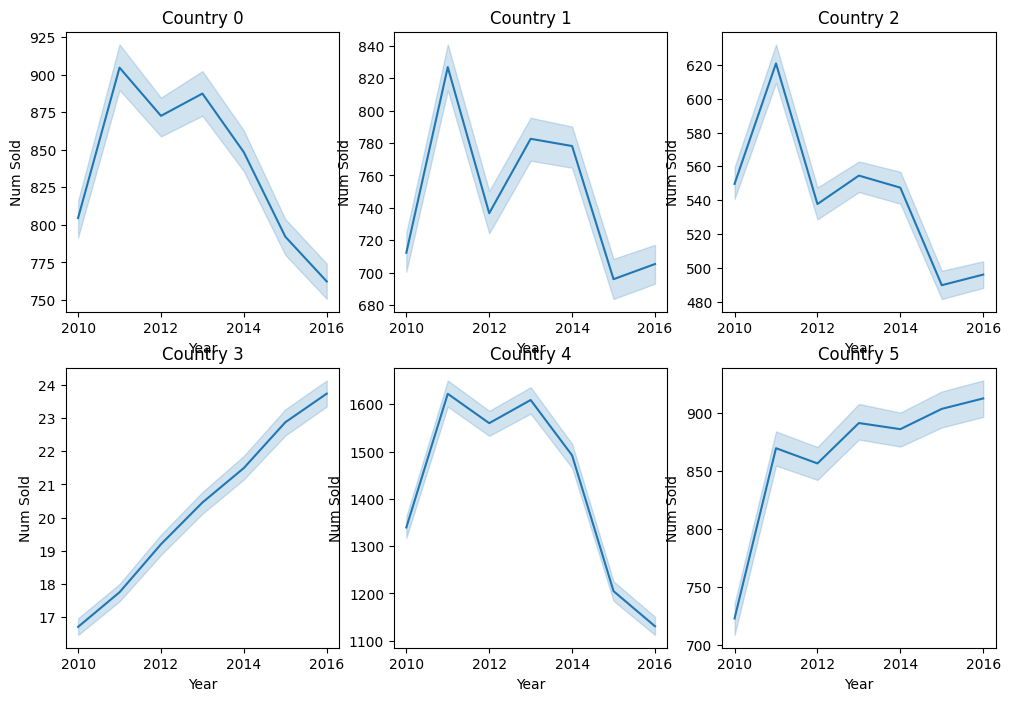

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()
for i in range(6):
    ax = axes[i]  # Get the current subplot axis
    sns.lineplot(x="year", y="num_sold", data=train_preprocess[train_preprocess['country'] == i], ax=ax)
    ax.set_title(f"Country {i}") #set title for each subplot
    ax.set_xlabel("Year") #set x label for each subplot
    ax.set_ylabel("Num Sold") #set y label for each subplot

In [39]:
## preprocess Pipeline
def preprocess_pipeline(data_frame):
    pass

In [40]:
test_1_cols = ['country','store','product','year','month','num_sold']

In [41]:
test_1_df = train_preprocess[test_1_cols]
test_1_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,country,store,product,year,month,num_sold
0,0,0,0,2010,1,NaN
1,0,0,1,2010,1,973.0
2,0,0,2,2010,1,906.0
3,0,0,3,2010,1,423.0
4,0,0,4,2010,1,491.0


In [42]:
## Drop NA cols
test_1_df.isna()

,country,store,product,year,month,num_sold
0,False,False,False,False,False,True
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
230125,False,False,False,False,False,False
230126,False,False,False,False,False,False
230127,False,False,False,False,False,False
230128,False,False,False,False,False,False


### Drop Missing Values

In [43]:
# train_preprocess_dropna = train_preprocess.dropna()
# train_preprocess_dropna.info()

In [44]:
# train_preprocess_dropna

In [45]:
# y = train_preprocess_dropna.pop('num_sold')
# X = train_preprocess_dropna.drop('id', axis=1)

In [46]:
# X

In [47]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)